In [2]:
%matplotlib inline
import numpy as np
import phconvert as phc
print('phconvert version: ' + phc.__version__)
f="/dataB/smfretData/LS33_RSV21c224c_alex488cy5_32MHZ 1.ptu"
d=phc.pqreader.load_ptu(f)

phconvert version: 0.8.1


In [3]:
print(len(d[0]))

49611150


In [4]:
print(len(d[1]))

49611150


In [5]:
print(len(d[2]))

49611150


In [6]:
print(len(d[3]))

4


In [7]:
import json
#parsed = json.loads(d[3])
print(json.dumps(d[3],indent=4))

{
    "timestamps_unit": 6.249687515624219e-08,
    "nanotimes_unit": 2.50000003337858e-11,
    "acquisition_duration": 36000.0,
    "tags": {
        "File_GUID": {
            "idx": -1,
            "type": "tyAnsiString",
            "value": 40,
            "data": "{ED7D5D2E-082F-43FC-A5C8-BC0CA22D831E}"
        },
        "File_CreatingTime": {
            "idx": -1,
            "type": "tyTDateTime",
            "value": "2017-07-03 17:19:26"
        },
        "$StartedByRemoteInterface": {
            "idx": -1,
            "type": "tyBool8",
            "value": true
        },
        "Measurement_SubMode": {
            "idx": -1,
            "type": "tyInt8",
            "value": 1
        },
        "File_Comment": {
            "idx": -1,
            "type": "tyAnsiString",
            "value": 176,
            "data": "{First Dichroic Mirror}: 405/488/561/640\r\n{Pinhole Size(um)}: 99.6\r\n{Scan Direction}: One way\r\n{Scanner Zoom}: 1.000\r\n{Scan Speed}: 128\r\n{Optic

In [8]:
print(int(d[3]["tags"]["TTResult_SyncRate"]['value']))
print(d[3]["timestamps_unit"]+1)

16000800
1.0000000624968752


(array([ 20762645.,     22722.,     22985.,     25220.,     25692.,
            33544.,     66985.,     62012.,     48243.,     47096.,
            45808.,   1563987.,   4528991.,   3268525.,   2208127.,
          1683180.,   1278151.,   1064910.,    857474.,    696707.,
           549355.,    476401.,    396670.,    332828.,    270785.,
           240885.,    206411.,    178493.,    149824.,    137325.,
           120842.,    107530.,     92671.,     86750.,     79891.,
            72522.,     63939.,     62056.,     57816.,     53758.,
            48829.,     47948.,     45487.,     43589.,     39825.,
            39944.,     38539.,     36748.,     34462.,     34913.,
            34065.,     33694.,     31353.,     31595.,     32165.,
            31612.,     31536.,     37384.,     53941.,     33491.,
            30528.,     31700.,     30606.,     60995.,   1505964.,
          1471890.,    945242.,    620197.,    407130.,    297820.,
           212712.,    155294.,    113707.,     

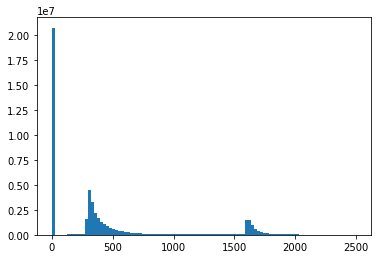

In [9]:
import matplotlib
matplotlib.pyplot.hist(d[2],101)

In [10]:
print(max(d[2]))

2500


In [11]:
for det, count in zip(*np.unique(d[1], return_counts=True)):
    print("%8d   %8d" % (det, count))

       0   14073392
       1   14797503
      65        197
      66        198
      68         78
     127   20739782


In [12]:
nanotimes = d[2]
detectors = d[1]
timestamps = d[0]

not_overflow = d[2] != 0

detectors = detectors[not_overflow]
timestamps = timestamps[not_overflow]
nanotimes = nanotimes[not_overflow]
print("Detector    Counts")
print("--------   --------")
for det, count in zip(*np.unique(detectors, return_counts=True)):
    print("%8d   %8d" % (det, count))


Detector    Counts
--------   --------
       0   14073100
       1   14797436


In [13]:
measurement_specs = dict(
    measurement_type = 'smFRET-nsALEX',
    laser_repetition_rate=int(d[3]["tags"]["TTResult_SyncRate"]['value']),
    detectors_specs = {'spectral_ch1': [1],  # list of donor's detector IDs
                       'spectral_ch2': [0]},  # list of acceptor's detector IDs
    alex_excitation_period1=[10,1240],
    alex_excitation_period2=[1260,2490]
    )
tcspc_num_bins=max(d[2])
nanotimes_specs=dict(
    tcspc_unit=float(d[3]["tags"]["MeasDesc_Resolution"]['value']),
    tcspc_num_bins=tcspc_num_bins,
    tcspc_range=float(d[3]["tags"]["MeasDesc_Resolution"]['value'])*tcspc_num_bins
)
photon_data = dict(
    timestamps=timestamps,
    detectors=detectors,
    timestamps_specs={'timestamps_unit': d[3]["timestamps_unit"]},
    measurement_specs=measurement_specs,
    nanotimes_specs=nanotimes_specs,
    nanotimes=nanotimes
)
setup = dict(
    ## Mandatory fields
    num_pixels = 2,                   # using 2 detectors
    num_spots = 1,                    # a single confoca excitation
    num_spectral_ch = 2,              # donor and acceptor detection 
    num_polarization_ch = 1,          # no polarization selection 
    num_split_ch = 1,                 # no beam splitter
    excitation_cw=[False,False],
    modulated_excitation = True,     # CW excitation, no modulation 
    excitation_alternated = [True,True],  # CW excitation, no modulation 
    lifetime = True                 #  TCSPC in detection
)

description = 'This is a fake dataset which mimics smFRET data.'

author = 'kk'
author_affiliation = 'Name of Research Institution'
identity = dict(
    author=author,
    author_affiliation=author_affiliation)
data = dict(
    description=description,
    photon_data = photon_data,
    setup=setup,
    identity=identity,
)
phc.hdf5.save_photon_hdf5(data, h5_fname='LS4.h5', overwrite=True)

Saving: LS4.h5
Photon-HDF5 WARNING: Missing field "excitation_wavelengths" in "/setup". 
Photon-HDF5 WARNING: Missing field "detection_wavelengths" in "/setup". 


In [14]:
timestamps

array([       6674,        7307,       10121, ..., 57603727362,
       57603728543, 57603731089])

In [15]:
float(d[3]["tags"]["MeasDesc_Resolution"]['value'])

2.50000003337858e-11